In [1]:
import os
import sys; sys.path.insert(0, os.path.abspath("../"))
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import List
from dataset.dataset import SkinLesion_Dataset, SegExamples
from pipeline.preprocessing import SkinLesionPreprocessing
from pipeline.feature_extraction import FeaturesExtraction

In [2]:
# import matplotlib as mpl
# # label_size = 12
# # mpl.rcParams['xtick.labelsize'] = label_size 
# # mpl.rcParams['ytick.labelsize'] = label_size 
# # mpl.rcParams[]
# plt.style.use('ggplot')

In [2]:
data = SkinLesion_Dataset(class_task='binary')
df = data.md_df

In [14]:
# df = df.loc[df.split == 'val', :]
sizes = df['size'].value_counts()

Text(0.5, 1.0, '10 most frequent sizes')

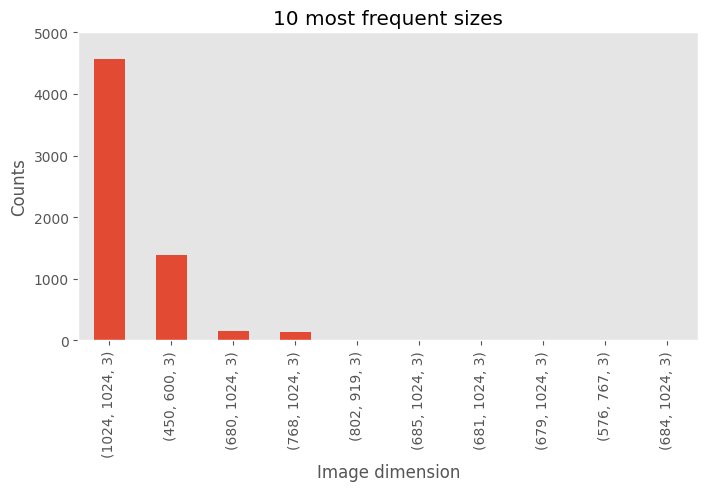

In [17]:
plt.figure(figsize=(8,4))
sizes.iloc[:10].plot.bar()
plt.grid()
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.ylim([0, 5000])
plt.xlabel('Image dimension')
plt.ylabel('Counts')
plt.title('10 most frequent sizes')

In [13]:
df.loc[df.split == 'val'].label.value_counts()

mel    678
bcc    498
scc     94
Name: label, dtype: int64

In [ ]:
## Cropping images
def plot_pairs(image):            
    f,axes = plt.subplots(1, 2, figsize=(5, 5))
    axes[0].imshow(image), axes[0].axis('off'), axes[0].set_title(f'Original image {image.shape}')
    image_cropped = crop_img(image)
    axes[1].imshow(image_cropped), axes[1].axis('off'), axes[1].set_title(f'Cropped image {image_cropped.shape}')

rand_images = np.random.randint(0, 7000, 10)
preproc = SkinLesionPreprocessing()


In [13]:
cfe = FeaturesExtraction(levels=['local'], lbp_params={}, glcm_params={}, gabor_params={})

In [14]:
print(len(cfe.features_names))
print(cfe.features_names)

60
['local_rgb_mean_1', 'local_rgb_mean_2', 'local_rgb_mean_3', 'local_rgb_std_1', 'local_rgb_std_2', 'local_rgb_std_3', 'local_rgb_skew_1', 'local_rgb_skew_2', 'local_rgb_skew_3', 'local_rgb_kur_1', 'local_rgb_kur_2', 'local_rgb_kur_3', 'local_rgb_ent_1', 'local_rgb_ent_2', 'local_rgb_ent_3', 'local_lab_mean_1', 'local_lab_mean_2', 'local_lab_mean_3', 'local_lab_std_1', 'local_lab_std_2', 'local_lab_std_3', 'local_lab_skew_1', 'local_lab_skew_2', 'local_lab_skew_3', 'local_lab_kur_1', 'local_lab_kur_2', 'local_lab_kur_3', 'local_lab_ent_1', 'local_lab_ent_2', 'local_lab_ent_3', 'local_ycrbcb_mean_1', 'local_ycrbcb_mean_2', 'local_ycrbcb_mean_3', 'local_ycrbcb_std_1', 'local_ycrbcb_std_2', 'local_ycrbcb_std_3', 'local_ycrbcb_skew_1', 'local_ycrbcb_skew_2', 'local_ycrbcb_skew_3', 'local_ycrbcb_kur_1', 'local_ycrbcb_kur_2', 'local_ycrbcb_kur_3', 'local_ycrbcb_ent_1', 'local_ycrbcb_ent_2', 'local_ycrbcb_ent_3', 'local_hsv_mean_1', 'local_hsv_mean_2', 'local_hsv_mean_3', 'local_hsv_std_1',

In [4]:
preproc = SkinLesionPreprocessing()
image = data[0]['img']
image_p = preproc.preprocess(image)
feat = cfe.extract_features(image_p)

In [5]:
(cfe.glcm_decomp.shape)

(256, 256, 2, 4)

Text(0.5, 1.0, 'GLCM d=2, a=90°')

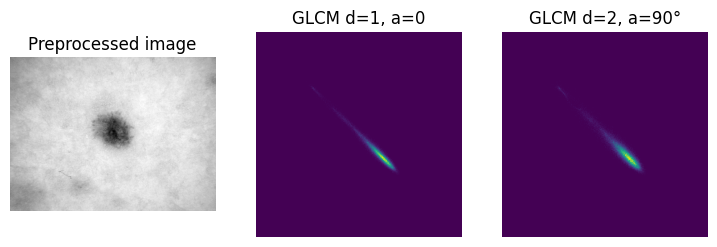

In [9]:
f,axs = plt.subplots(1,3, figsize=(9,3))
axs[0].imshow(image[:,:,2], cmap='gray')
axs[0].axis('off')
axs[0].set_title('Preprocessed image')
axs[1].imshow(cfe.glcm_decomp[:,:,0,0])
axs[1].axis('off')
axs[1].set_title('GLCM d=1, a=0')
axs[2].imshow(cfe.glcm_decomp[:,:,1,2])
axs[2].axis('off')
axs[2].set_title('GLCM d=2, a=90°')

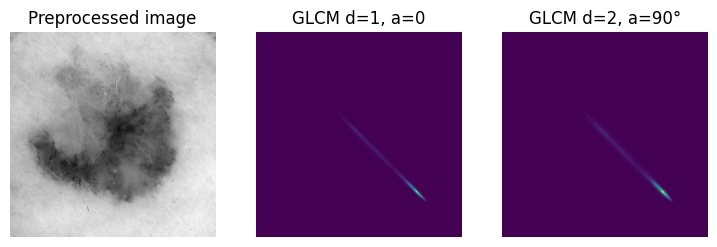

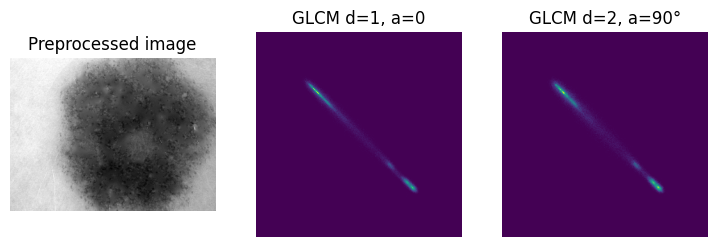

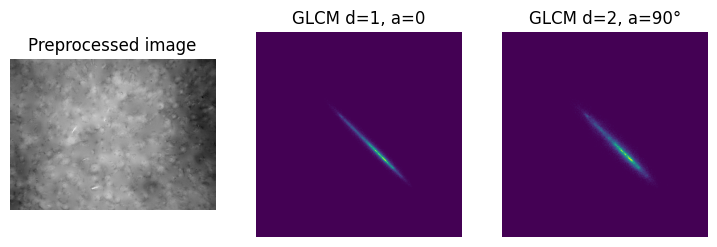

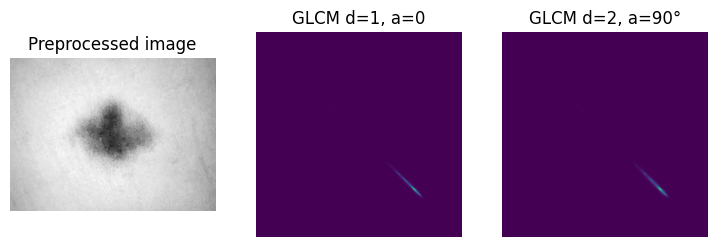

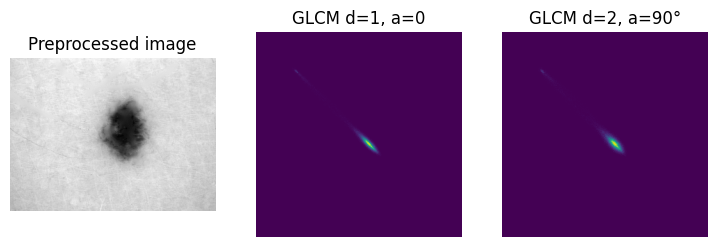

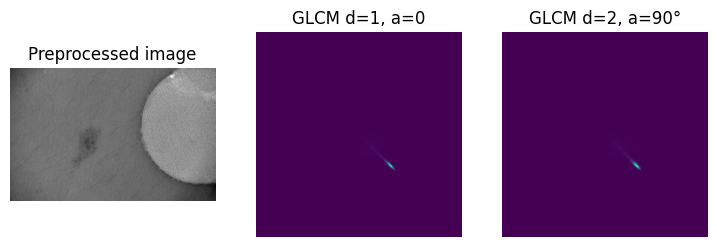

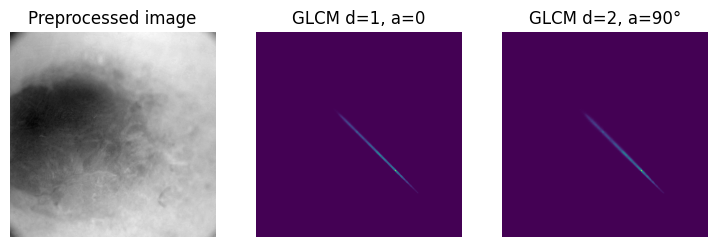

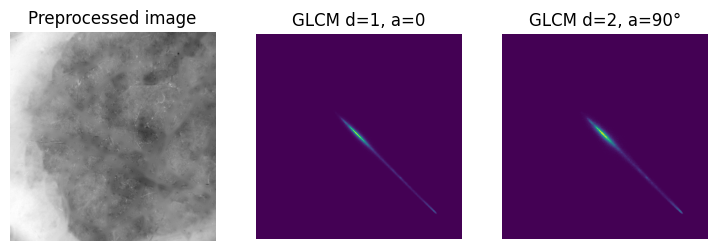

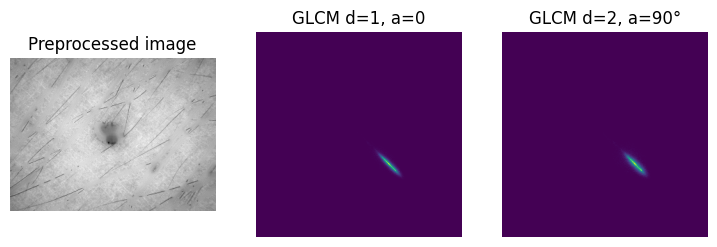

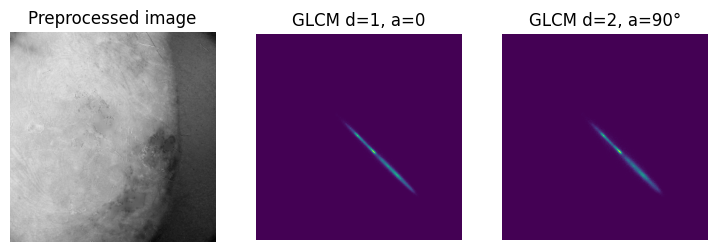

In [12]:
rand_images = np.random.randint(0, 7000, 10)

for i in rand_images:
    cfe = FeaturesExtraction(levels=['global'], lbp_params={}, color_params={}, gabor_params={})
    preproc = SkinLesionPreprocessing()
    image = data[i]['img']
    image_p = preproc.preprocess(image)
    feat = cfe.extract_features(image_p)

    f,axs = plt.subplots(1,3, figsize=(9,3))
    axs[0].imshow(image_p[:,:,2], cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Preprocessed image')
    axs[1].imshow(cfe.glcm_decomp[:,:,0,0])
    axs[1].axis('off')
    axs[1].set_title('GLCM d=1, a=0')
    axs[2].imshow(cfe.glcm_decomp[:,:,1,2])
    axs[2].axis('off')
    axs[2].set_title('GLCM d=2, a=90°')

In [32]:
df.shape

(18991, 8)

In [45]:
preproc = SkinLesionPreprocessing()
image = data[8872]['img']
image_p = preproc.preprocess(image)
f_images = []
kernels = []
for d in range(1,4,1):
    theta = 1 * np.pi/d
    kernels.append(cv2.getGaborKernel((3,3), 1, theta, 1*np.pi/4, 1, 0, ktype=cv2.CV_32F))
    f_images.append(cv2.filter2D(image_p, cv2.CV_8UC3, kernels[d-1]))

(-0.5, 287.5, 336.5, -0.5)

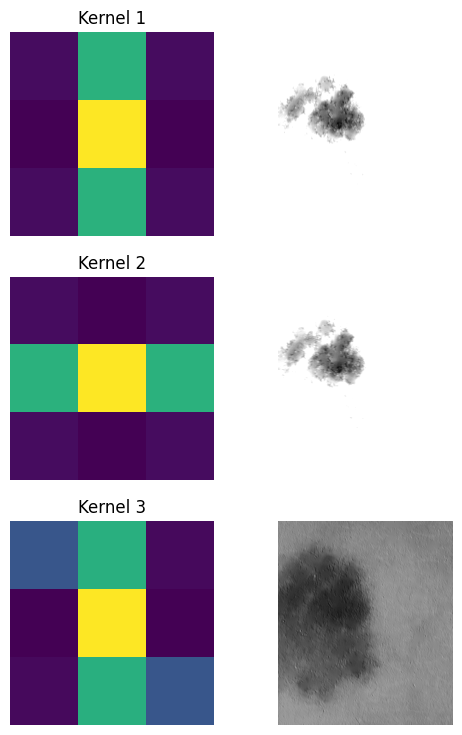

In [46]:
f,axs = plt.subplots(3,2, figsize=(6,9))
axs[0,0].imshow(kernels[0])
axs[0,0].axis('off')
axs[0,0].set_title('Kernel 1')
axs[1,0].imshow(kernels[1])
axs[1,0].axis('off')
axs[1,0].set_title('Kernel 2')
axs[2,0].imshow(kernels[2])
axs[2,0].axis('off')
axs[2,0].set_title('Kernel 3')

axs[0,1].imshow(f_images[0][:,:,2], cmap='gray')
axs[0,1].axis('off')
# axs[1,0].set_title('Filtered w/ kernel 1')
axs[1,1].imshow(f_images[1][:,:,2], cmap='gray')
axs[1,1].axis('off')
# axs[1,1].set_title('Filtered w/ kernel 2')
axs[2,1].imshow(f_images[2][:,:,2], cmap='gray')
axs[2,1].axis('off')
# axs[1,2].set_title('Filtered w/ kernel 3')

[(-0.5, 511.5, 342.5, -0.5), (-0.5, 287.5, 336.5, -0.5)]

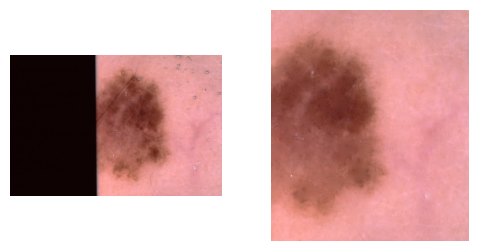

In [50]:
f,axs = plt.subplots(1,2, figsize=(6,3))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(image_p, cv2.COLOR_BGR2RGB))
[ax.axis('off') for ax in axs]